**OPTIMISATION EXPERIMENT- SATISFIABILITY**

In [ ]:
!pip install torch torchvision torchaudio torch-geometric networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
import random

def generate_2sat_instance(num_vars=100, num_clauses=50):
    #Generates a random 2-SAT instance with num_clauses clauses
    clauses = []
    for _ in range(num_clauses):
        x1 = random.randint(1, num_vars)
        x2 = random.randint(1, num_vars)
        x1 = x1 if random.random() < 0.5 else -x1
        x2 = x2 if random.random() < 0.5 else -x2
        clauses.append((x1, x2))
    return clauses

#generate 500 instances
dataset_2sat = [generate_2sat_instance(num_vars=100, num_clauses=50) for _ in range(500)]
print(dataset_2sat)

[[(1, 1), (-1, 2), (3, -4)], [(2, 5), (-5, 2), (-3, -3)], [(-3, -1), (-3, 3), (3, -2)], [(5, -3), (-3, -3), (3, -5)], [(-3, -1), (-1, -5), (-5, 5)], [(2, -4), (2, 2), (-1, -4)], [(1, -3), (3, -4), (-3, 4)], [(-3, 2), (5, 1), (-5, 1)], [(-4, 5), (2, 4), (2, -1)], [(-4, -1), (-3, 4), (-4, 3)], [(-3, 4), (3, -2), (-5, 5)], [(3, 3), (1, 4), (4, 1)], [(-5, 5), (1, 1), (3, 3)], [(-3, 5), (-2, 2), (-1, -1)], [(2, -1), (-2, -5), (-2, -2)], [(2, 2), (-4, -2), (4, -5)], [(3, -1), (-5, -2), (-1, -4)], [(-2, 2), (-5, 4), (-5, 3)], [(5, 2), (-1, 2), (-5, -4)], [(-5, -1), (1, -1), (-2, 5)], [(5, -4), (5, -3), (4, 4)], [(-1, -5), (-3, -4), (-4, 3)], [(4, 5), (4, 3), (5, -2)], [(5, -3), (-5, -5), (-2, 2)], [(-5, 1), (-3, 3), (4, -1)], [(2, -1), (-5, 4), (-4, -2)], [(2, 2), (2, 1), (2, 1)], [(-5, 4), (2, 3), (3, 4)], [(-3, 3), (-3, 1), (5, -5)], [(-4, -3), (4, 3), (1, 3)], [(-3, -1), (1, 3), (2, -4)], [(1, -5), (-5, -5), (2, 3)], [(-4, 3), (4, -5), (5, 4)], [(1, 3), (5, 5), (-5, 4)], [(3, 3), (-4, 1), 

In [ ]:
import networkx as nx

def is_2sat_satisfiable(clauses, num_vars):
    #Determines if a 2-SAT instance is satisfiable using SCC detection
    G = nx.DiGraph()

    #implication Graph
    for x1, x2 in clauses:
        G.add_edge(-x1, x2)  # ¬x1 → x2
        G.add_edge(-x2, x1)  # ¬x2 → x1

    #find SCCs
    sccs = list(nx.strongly_connected_components(G))

    #check for var and its negation
    node_to_scc = {node: idx for idx, scc in enumerate(sccs) for node in scc}

    for var in range(1, num_vars + 1):
        if var in node_to_scc and -var in node_to_scc:
            if node_to_scc[var] == node_to_scc[-var]:
                return False  #UNSAT(Contradiction found)

    return True  #SAT(No contradiction)

In [ ]:
#dataset with SAT/UNSAT label
dataset_2sat = []
num_vars = 100
num_clauses = 50

for _ in range(500):
    clauses = generate_2sat_instance(num_vars, num_clauses)
    sat_result = is_2sat_satisfiable(clauses, num_vars)
    dataset_2sat.append((clauses, sat_result))

print(dataset_2sat[:5])

[([(87, 19), (-69, -84), (-70, 69), (51, 75), (-15, -71), (-6, 73), (-75, 22), (-73, -17), (-54, -50), (-27, 7), (-84, -76), (-98, -20), (73, 74), (65, 19), (95, -64), (-32, -93), (91, -15), (-26, 1), (33, 90), (21, 98), (53, -14), (43, -41), (11, -83), (54, 94), (-55, -50), (-88, 27), (-49, 54), (-93, -5), (-50, -78), (4, 22), (27, -23), (-78, -6), (15, 3), (-70, 100), (34, -67), (73, -12), (50, -7), (11, -5), (-48, 73), (55, 62), (57, 46), (16, -62), (-12, -50), (-33, 92), (57, -73), (64, 10), (96, 56), (-8, -43), (33, 100), (95, -87)], True), ([(85, -52), (-2, 55), (-100, -3), (94, -64), (-96, -5), (26, 44), (49, 16), (80, -79), (60, 83), (50, 83), (-67, -22), (58, -13), (6, 36), (-16, -90), (19, -1), (-10, 18), (-79, -44), (-18, -36), (-100, 99), (63, 13), (5, 58), (24, 61), (-70, -46), (-70, 20), (-47, -86), (-51, -14), (-32, 91), (-61, 81), (-29, -86), (-23, 74), (43, 2), (65, -77), (23, -58), (-29, 81), (44, 70), (62, 87), (-92, 76), (-63, 82), (42, -40), (-46, 82), (-83, 87), (

In [ ]:
#Converts a 2-SAT instance to a 3-SAT instance by adding a single new variable (x_new) and its negation to each clause.

def convert_2sat_to_3sat(clauses, num_vars):
    new_var = num_vars + 1
    new_clauses = []

    for x1, x2 in clauses:
        new_clauses.append((x1, x2, new_var))   # (x1 ∨ x2 ∨ x_new)
        new_clauses.append((x1, x2, -new_var))  # (x1 ∨ x2 ∨ ¬x_new)

    return new_clauses, new_var

#convert entire dataset from 2-SAT to 3-SAT
dataset_3sat = []
for clauses, sat_result in dataset_2sat:
    clauses_3sat, new_var = convert_2sat_to_3sat(clauses, num_vars=100)
    dataset_3sat.append((clauses_3sat, sat_result))

#print first 5 converted instances
for i in range(5):
    print(f"2-SAT instance {i+1}:")
    print("Original 2-SAT Clauses:", dataset_2sat[i][0])
    print("Converted 3-SAT Clauses:", dataset_3sat[i][0])
    print("Satisfiability:", "SAT" if dataset_3sat[i][1] else "UNSAT")
    print("-" * 50)

2-SAT instance 1:
Original 2-SAT Clauses: [(87, 19), (-69, -84), (-70, 69), (51, 75), (-15, -71), (-6, 73), (-75, 22), (-73, -17), (-54, -50), (-27, 7), (-84, -76), (-98, -20), (73, 74), (65, 19), (95, -64), (-32, -93), (91, -15), (-26, 1), (33, 90), (21, 98), (53, -14), (43, -41), (11, -83), (54, 94), (-55, -50), (-88, 27), (-49, 54), (-93, -5), (-50, -78), (4, 22), (27, -23), (-78, -6), (15, 3), (-70, 100), (34, -67), (73, -12), (50, -7), (11, -5), (-48, 73), (55, 62), (57, 46), (16, -62), (-12, -50), (-33, 92), (57, -73), (64, 10), (96, 56), (-8, -43), (33, 100), (95, -87)]
Converted 3-SAT Clauses: [(87, 19, 101), (87, 19, -101), (-69, -84, 101), (-69, -84, -101), (-70, 69, 101), (-70, 69, -101), (51, 75, 101), (51, 75, -101), (-15, -71, 101), (-15, -71, -101), (-6, 73, 101), (-6, 73, -101), (-75, 22, 101), (-75, 22, -101), (-73, -17, 101), (-73, -17, -101), (-54, -50, 101), (-54, -50, -101), (-27, 7, 101), (-27, 7, -101), (-84, -76, 101), (-84, -76, -101), (-98, -20, 101), (-98, -2

In [ ]:
import networkx as nx
import torch
from torch_geometric.data import Data
from networkx.algorithms.approximation import clique

#converts a 3-SAT instance into a graph using the standard 3-SAT to Clique reduction

def three_sat_to_clique(clauses, sat_result):
    G = nx.Graph()
    clause_literals = []

    #each literal in a clause becomes a node
    for clause in clauses:
        clause_literals.append([])
        for lit in clause:
            G.add_node(lit)
            clause_literals[-1].append(lit)

    #only between non-contradictory literals from different clauses
    for i in range(len(clause_literals)):
        for j in range(i + 1, len(clause_literals)):
            for lit_i in clause_literals[i]:
                for lit_j in clause_literals[j]:
                    if lit_i != -lit_j:
                        G.add_edge(lit_i, lit_j)

    #PyG format
    mapping = {node: idx for idx, node in enumerate(G.nodes)}
    G = nx.relabel_nodes(G, mapping)

    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()

    #node feature: 1 for SAT, 0 for UNSAT
    x = torch.tensor([[1.0] if sat_result else [0.0] for _ in range(len(G.nodes))], dtype=torch.float)

    #maximum clique size
    clique_number = len(clique.max_clique(G))

    return Data(x=x, edge_index=edge_index, y=torch.tensor([clique_number], dtype=torch.float))

graph_dataset = [three_sat_to_clique(clauses, sat_result) for clauses, sat_result in dataset_3sat]

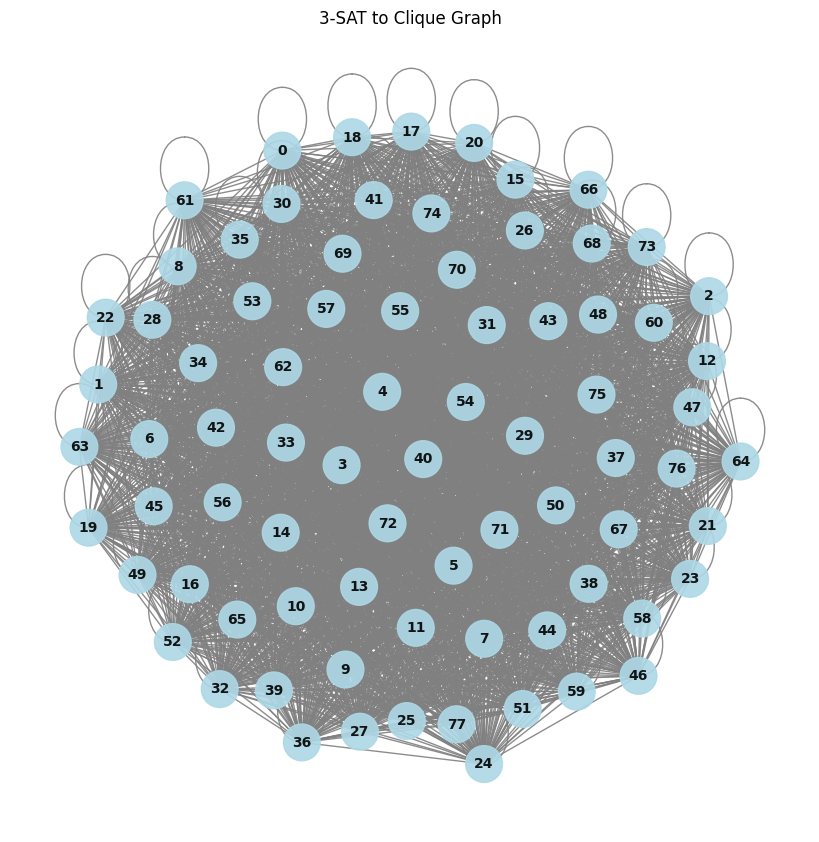

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.utils import to_networkx

def visualize_graph(data, title="3-SAT to Clique Graph"):
    G = to_networkx(data, to_undirected=True)

    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    node_colors = ["lightblue" for node in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_size=700, font_size=10,
            font_weight="bold", edge_color="gray", node_color=node_colors, alpha=0.9)

    plt.title(title)
    plt.show()


visualize_graph(graph_dataset[0])

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.fc = nn.Linear(out_channels, 1)  #predict clique number

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = x.mean(dim=0)  #aggregate node embeddings
        return self.fc(x).squeeze()

model = GCN(in_channels=1, hidden_channels=16, out_channels=16)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [ ]:
import matplotlib.pyplot as plt

def train_gcn(model, dataset, epochs=50):
    model.train()
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for data in dataset:
            optimizer.zero_grad()
            pred = model(data).view(-1)
            loss = criterion(pred, data.y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataset)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    return losses

losses = train_gcn(model, graph_dataset)

train_gcn(model, graph_dataset)

Epoch 1/50, Loss: 314.8297
Epoch 2/50, Loss: 14.3902
Epoch 3/50, Loss: 14.6108
Epoch 4/50, Loss: 14.5843
Epoch 5/50, Loss: 14.4853
Epoch 6/50, Loss: 14.3630
Epoch 7/50, Loss: 14.2355
Epoch 8/50, Loss: 14.1120
Epoch 9/50, Loss: 13.9987
Epoch 10/50, Loss: 13.8985
Epoch 11/50, Loss: 13.8093
Epoch 12/50, Loss: 13.7279
Epoch 13/50, Loss: 13.6541
Epoch 14/50, Loss: 13.5867
Epoch 15/50, Loss: 13.5253
Epoch 16/50, Loss: 13.4704
Epoch 17/50, Loss: 13.4188
Epoch 18/50, Loss: 13.3705
Epoch 19/50, Loss: 13.3250
Epoch 20/50, Loss: 13.2800
Epoch 21/50, Loss: 13.2403
Epoch 22/50, Loss: 13.1992
Epoch 23/50, Loss: 13.1582
Epoch 24/50, Loss: 13.1165
Epoch 25/50, Loss: 13.0735
Epoch 26/50, Loss: 13.0288
Epoch 27/50, Loss: 12.9826
Epoch 28/50, Loss: 12.9362
Epoch 29/50, Loss: 12.8924
Epoch 30/50, Loss: 12.8526
Epoch 31/50, Loss: 12.8198
Epoch 32/50, Loss: 12.7924
Epoch 33/50, Loss: 12.7673
Epoch 34/50, Loss: 12.7419
Epoch 35/50, Loss: 12.7129
Epoch 36/50, Loss: 12.6815
Epoch 37/50, Loss: 12.6434
Epoch 38/

[12.31479112446509,
 12.312561446522478,
 12.264685685881094,
 12.31967947287229,
 12.228263533681165,
 12.225047818236053,
 12.170058705321223,
 12.191350289854803,
 12.109592471030105,
 12.117953978551116,
 12.058500339640334,
 12.10494577085742,
 12.04075436842558,
 12.065735917057028,
 12.020591791073356,
 12.055341739500408,
 11.9987482000835,
 12.034351144077839,
 11.976330709617002,
 12.006506136435434,
 11.950757804453838,
 11.98365351694639,
 11.922487343327724,
 11.953105147250142,
 11.891037806951092,
 11.91760663212699,
 11.85524461073673,
 11.877888865986606,
 11.813878800964682,
 11.8326033597356,
 11.765511885386339,
 11.780841668339214,
 11.708448076243775,
 11.717573180763313,
 11.640322807078745,
 11.642552647343255,
 11.559789737973363,
 11.556686364980182,
 11.474211031908752,
 11.47357430733589,
 11.412264031423168,
 11.404332834809,
 11.359594242365448,
 11.38201152872434,
 11.307377052107507,
 11.31871901065344,
 11.265561657561221,
 11.28101897971693,
 11.239770

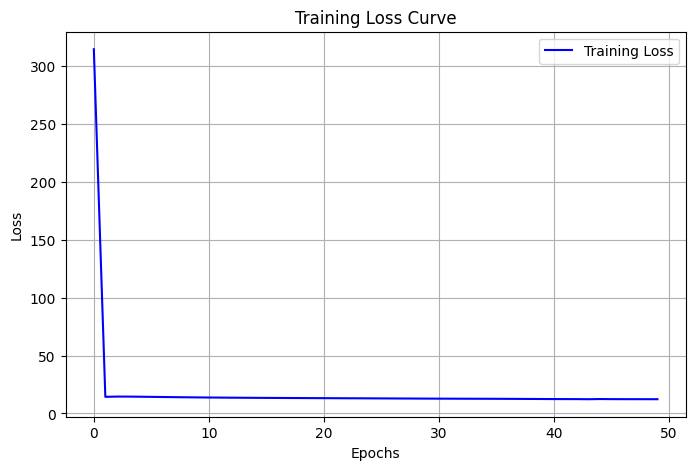

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_gcn(model, dataset):
    model.eval()
    actuals, predictions = [], []

    with torch.no_grad():
        for data in dataset:
            pred = model(data).view(-1).item()  # Get predicted value
            pred = max(1, min(pred, data.y.item()))  # Ensure valid clique range

            actuals.append(data.y.item())
            predictions.append(pred)

    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    return actuals, predictions

actuals, predictions = evaluate_gcn(model, graph_dataset)

Mean Absolute Error (MAE): 0.8980
Mean Squared Error (MSE): 3.1508


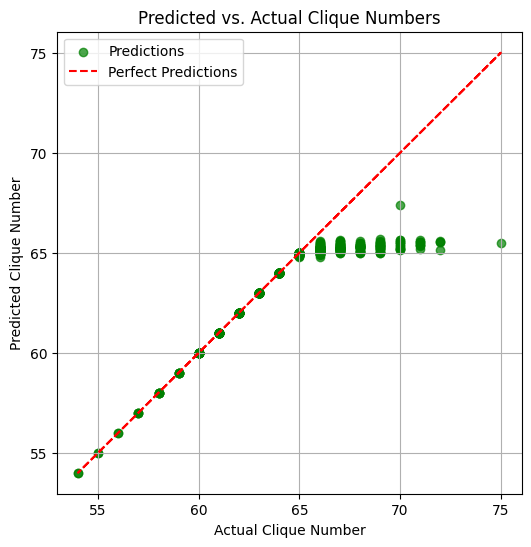

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(actuals, predictions, color='green', alpha=0.7, label="Predictions")
plt.plot(actuals, actuals, color='red', linestyle='dashed', label="Perfect Predictions")  # y = x line

plt.xlabel("Actual Clique Number")
plt.ylabel("Predicted Clique Number")
plt.title("Predicted vs. Actual Clique Numbers")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import os
import requests

#SATLIB URL for 3-SAT problems
SATLIB_URL = "https://www.cs.ubc.ca/~hoos/SATLIB/Benchmarks/SAT/RND3SAT/uf50-218.tar.gz"
FILE_NAME = "uf50-218.tar.gz"

if not os.path.exists(FILE_NAME):
    response = requests.get(SATLIB_URL, stream=True)
    with open(FILE_NAME, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            f.write(chunk)
    print("Done ")

Done 


In [ ]:
import os
import requests

SATLIB_URL = "https://www.cs.ubc.ca/~hoos/SATLIB/Benchmarks/SAT/RND3SAT/uf50-218.tar.gz"
FILE_NAME = "uf100-430.tar.gz"

if not os.path.exists(FILE_NAME):
    response = requests.get(SATLIB_URL, stream=True)
    with open(FILE_NAME, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            f.write(chunk)
    print("Done 2")

Done 2


In [ ]:
import os
import requests

SATLIB_URL = "https://www.cs.ubc.ca/~hoos/SATLIB/Benchmarks/SAT/RND3SAT/uf50-218.tar.gz"
FILE_NAME = "uf250-1065.tar.gz"

if not os.path.exists(FILE_NAME):
    response = requests.get(SATLIB_URL, stream=True)
    with open(FILE_NAME, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            f.write(chunk)
    print("Done 3")

Done 3


In [ ]:
!pip install python-sat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.8 MB/s eta 0:00:00


In [ ]:
from pysat.solvers import Solver

#checks if a 3-SAT formula is satisfiable using PySAT
def check_satisfiability(clauses):
    solver = Solver(name="glucose3")
    for clause in clauses:
        solver.add_clause(clause)
    sat_result = solver.solve()
    solver.delete()
    return sat_result

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

def parse_dimacs(file_path):
    """Parses a DIMACS CNF file and returns a list of clauses."""
    clauses = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("c") or line.startswith("p"):
                continue
            clause = list(map(int, line.strip().split()[:-1]))
            clauses.append(clause)
    return clauses

directory_path = "/content/drive/MyDrive/uf50-218/"

cnf_files1 = [f for f in os.listdir(directory_path) if f.endswith(".cnf")]

if cnf_files1:
    file_path = os.path.join(directory_path, cnf_files1[0])
    clauses = parse_dimacs(file_path)
    print(f"Parsed clauses from {file_path}:")
    print(clauses)
else:
    print("No CNF files found in the directory.")


Parsed clauses from /content/drive/MyDrive/uf50-218/uf50-0269.cnf:
[[-34, 50, -47], [-10, -2, 11], [-29, -49, -33], [-32, -44, -47], [-14, 6, 42], [-4, -48, 6], [-36, -4, 25], [20, -9, 21], [-50, 21, 47], [-40, 21, -28], [-38, 21, -40], [-16, 5, 38], [-12, 21, 27], [-36, 22, -38], [-5, -8, -16], [25, 27, 3], [-49, 35, -27], [-5, 36, 49], [-48, -4, 43], [-30, 41, 18], [-27, 48, 35], [-1, -10, 39], [5, -2, 49], [25, 30, 21], [-28, -43, 46], [-3, -15, -16], [-41, 44, -37], [-42, -26, 35], [-8, 4, 46], [-34, -48, -3], [48, -45, -5], [-41, 23, 42], [-11, -43, 39], [12, 41, -21], [17, -2, -39], [9, -29, 26], [10, 32, -30], [14, 20, 23], [-20, -26, 47], [32, 49, -17], [-1, -27, 25], [34, -49, 48], [44, 14, -26], [23, 34, -16], [35, 5, 47], [48, 25, -41], [-39, -35, -28], [43, 41, 19], [33, 39, 24], [-37, -18, -19], [35, 17, 23], [-45, 3, 30], [-23, 44, 47], [50, -35, 41], [46, 24, 22], [47, 45, -30], [22, -46, -49], [7, -49, -43], [-6, 40, 31], [1, 9, 41], [35, -20, -45], [10, 11, 42], [9, 18

In [ ]:
import os

def parse_dimacs(file_path):
    """Parses a DIMACS CNF file and returns a list of clauses."""
    clauses = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("c") or line.startswith("p"):
                continue
            clause = list(map(int, line.strip().split()[:-1]))
            clauses.append(clause)
    return clauses

directory_path = "/content/drive/MyDrive/uf100-430/"

cnf_files2 = [f for f in os.listdir(directory_path) if f.endswith(".cnf")]

if cnf_files2:
    file_path = os.path.join(directory_path, cnf_files2[0])
    clauses = parse_dimacs(file_path)
    print(f"Parsed clauses from {file_path}:")
    print(clauses)
else:
    print("No CNF files found in the directory.")

Parsed clauses from /content/drive/MyDrive/uf100-430/uf50-0146.cnf:
[[-42, 18, -28], [39, 44, 2], [-35, 40, -50], [49, -18, -42], [42, 48, -30], [47, -20, 18], [10, -35, -5], [-33, 25, 18], [32, -22, 41], [-20, -38, 19], [38, -40, 5], [20, -16, 32], [30, -15, -47], [25, -29, 50], [-7, 18, -49], [28, -11, 47], [-24, -46, 48], [-9, -8, -12], [24, 36, 6], [-41, -23, -11], [6, 38, 45], [38, 9, -17], [8, 30, 37], [27, -1, -49], [28, -50, 17], [43, 42, 36], [14, -13, 40], [23, -13, 1], [-1, -29, -49], [39, 12, -37], [27, 10, -26], [35, -30, 41], [-39, -16, 36], [-13, 41, -11], [-29, 36, 35], [10, -13, 44], [7, -13, 31], [17, -22, 9], [-48, -25, -32], [-16, -36, -15], [-9, -50, -27], [37, -35, -12], [-36, 1, 20], [-16, -5, -29], [-27, 9, 14], [25, -16, -2], [1, -32, -13], [-11, -34, 49], [35, -43, 11], [42, 17, 11], [7, -33, -34], [-37, -35, 11], [-47, -8, 43], [50, -23, 13], [13, -28, -19], [42, -39, -11], [4, -33, -30], [23, 28, 35], [-36, -22, -46], [50, 45, -8], [47, -9, -30], [-1, -36, -

In [ ]:
import os

def parse_dimacs(file_path):
    """Parses a DIMACS CNF file and returns a list of clauses."""
    clauses = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("c") or line.startswith("p"):
                continue
            clause = list(map(int, line.strip().split()[:-1]))
            clauses.append(clause)
    return clauses

directory_path = "/content/drive/MyDrive/uf250-1065"

cnf_files3 = [f for f in os.listdir(directory_path) if f.endswith(".cnf")]

if cnf_files3:
    file_path = os.path.join(directory_path, cnf_files3[0])
    clauses = parse_dimacs(file_path)
    print(f"Parsed clauses from {file_path}:")
    print(clauses)
else:
    print("No CNF files found in the directory.")

Parsed clauses from /content/drive/MyDrive/uf250-1065/uf50-0131.cnf:
[[39, 36, -33], [-25, -15, -47], [16, -2, 10], [6, -46, 40], [30, 29, -13], [35, 9, -22], [12, -38, -5], [-35, 45, -42], [20, 7, 24], [10, 44, 43], [-10, 41, -21], [-21, -19, 25], [11, -45, -5], [-25, 2, 7], [43, 9, -14], [25, 6, -46], [-26, 31, -49], [13, 18, -43], [1, -47, 39], [-28, -23, -14], [17, 13, -34], [-41, -43, -27], [-38, 5, 50], [17, -22, -19], [11, -7, 21], [-3, -14, -21], [33, 16, 31], [-42, 43, -27], [-14, -39, -20], [31, -6, 5], [-9, 32, -16], [-18, 1, 7], [-19, -50, -5], [43, -5, 16], [11, 18, -16], [17, -27, 32], [24, 45, -30], [-40, -3, 47], [-27, -49, -39], [50, 3, 15], [32, 48, -36], [37, -27, -25], [8, 37, 30], [27, -47, 23], [-14, 36, -10], [38, -33, -28], [-3, -33, 8], [-4, 6, 42], [-8, -35, -9], [-37, -13, -31], [27, 29, 14], [-36, -4, -42], [-49, 34, 45], [2, 24, -38], [-5, -40, -50], [-16, 14, 19], [-38, -3, 23], [19, -45, 37], [17, -36, -27], [-42, -50, 20], [32, -49, -20], [-20, -16, -41]

In [ ]:
import os

dataset_dirs = [
    "/content/drive/MyDrive/uf50-218/",
    "/content/drive/MyDrive/uf100-430/",
    "/content/drive/MyDrive/uf250-1065/"
]

cnf_files = []
for directory in dataset_dirs:
    cnf_files.extend(
        [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".cnf")]
    )

print(f"Found {len(cnf_files)} CNF files across all datasets.")


Found 3000 CNF files across all datasets.


In [ ]:
graph_dataset_satlib = []
for file_path in cnf_files:
    clauses = parse_dimacs(file_path)
    sat_label = check_satisfiability(clauses)
    graph_data = three_sat_to_clique(clauses, sat_label)
    graph_dataset_satlib.append(graph_data)

print(f"Converted {len(graph_dataset_satlib)} SATLIB instances to graph format.")

Converted 3000 SATLIB instances to graph format.


In [ ]:
print(graph_dataset_satlib)

[Data(x=[100, 1], edge_index=[2, 4997], y=[1]), Data(x=[99, 1], edge_index=[2, 4901], y=[1]), Data(x=[100, 1], edge_index=[2, 4999], y=[1]), Data(x=[100, 1], edge_index=[2, 4999], y=[1]), Data(x=[100, 1], edge_index=[2, 5000], y=[1]), Data(x=[100, 1], edge_index=[2, 5000], y=[1]), Data(x=[100, 1], edge_index=[2, 4998], y=[1]), Data(x=[99, 1], edge_index=[2, 4901], y=[1]), Data(x=[100, 1], edge_index=[2, 5000], y=[1]), Data(x=[100, 1], edge_index=[2, 4999], y=[1]), Data(x=[100, 1], edge_index=[2, 5000], y=[1]), Data(x=[100, 1], edge_index=[2, 4998], y=[1]), Data(x=[100, 1], edge_index=[2, 5000], y=[1]), Data(x=[100, 1], edge_index=[2, 4998], y=[1]), Data(x=[100, 1], edge_index=[2, 4999], y=[1]), Data(x=[100, 1], edge_index=[2, 4998], y=[1]), Data(x=[100, 1], edge_index=[2, 4997], y=[1]), Data(x=[100, 1], edge_index=[2, 4998], y=[1]), Data(x=[100, 1], edge_index=[2, 4997], y=[1]), Data(x=[100, 1], edge_index=[2, 4999], y=[1]), Data(x=[99, 1], edge_index=[2, 4901], y=[1]), Data(x=[100, 1]

In [ ]:
train_set_nodes = set([tuple(data.x.flatten().tolist()) for data in graph_dataset])
test_set_nodes = set([tuple(data.x.flatten().tolist()) for data in graph_dataset_satlib])

intersection = train_set_nodes.intersection(test_set_nodes)
print(f"Number of overlapping graphs between train and test: {len(intersection)}")

Number of overlapping graphs between train and test: 0


In [ ]:
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_gcn(model, dataset):
    """Evaluates the trained GCN model on a dataset."""
    model.eval()
    actuals, predictions = [], []

    with torch.no_grad():
        for data in dataset:
            pred = model(data).view(-1).item()
            #pred = max(1, min(pred, data.y.item()))

            actuals.append(data.y.item())  #true clique size
            predictions.append(pred)  #predicted clique size

    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return actuals, predictions

actuals, predictions = evaluate_gcn(model, graph_dataset_satlib)
for i in range(10):
    print(f"Actual: {actuals[i]}, Predicted: {predictions[i]}")

Mean Absolute Error (MAE): 9.7620
Mean Squared Error (MSE): 95.3022
R² Score: 0.0000
Actual: 50.0, Predicted: 59.69764709472656
Actual: 50.0, Predicted: 59.7073974609375
Actual: 50.0, Predicted: 59.701507568359375
Actual: 50.0, Predicted: 59.777679443359375
Actual: 50.0, Predicted: 59.844825744628906
Actual: 50.0, Predicted: 59.76005554199219
Actual: 50.0, Predicted: 59.70904541015625
Actual: 50.0, Predicted: 59.82557678222656
Actual: 50.0, Predicted: 59.694114685058594
Actual: 50.0, Predicted: 59.71282196044922


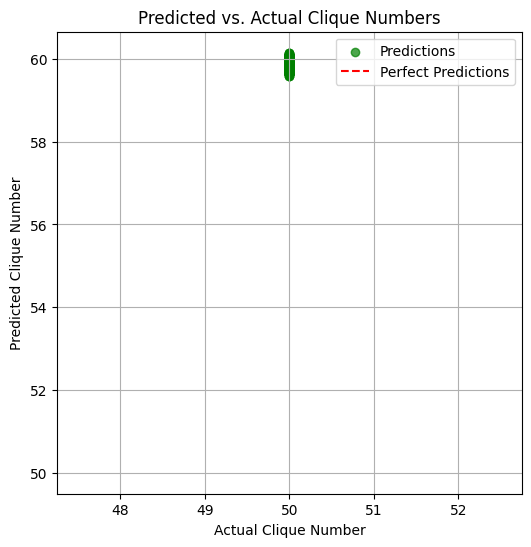

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(actuals, predictions, color='green', alpha=0.7, label="Predictions")
plt.plot(actuals, actuals, color='red', linestyle='dashed', label="Perfect Predictions")  # y = x line

plt.xlabel("Actual Clique Number")
plt.ylabel("Predicted Clique Number")
plt.title("Predicted vs. Actual Clique Numbers")
plt.legend()
plt.grid()
plt.show()

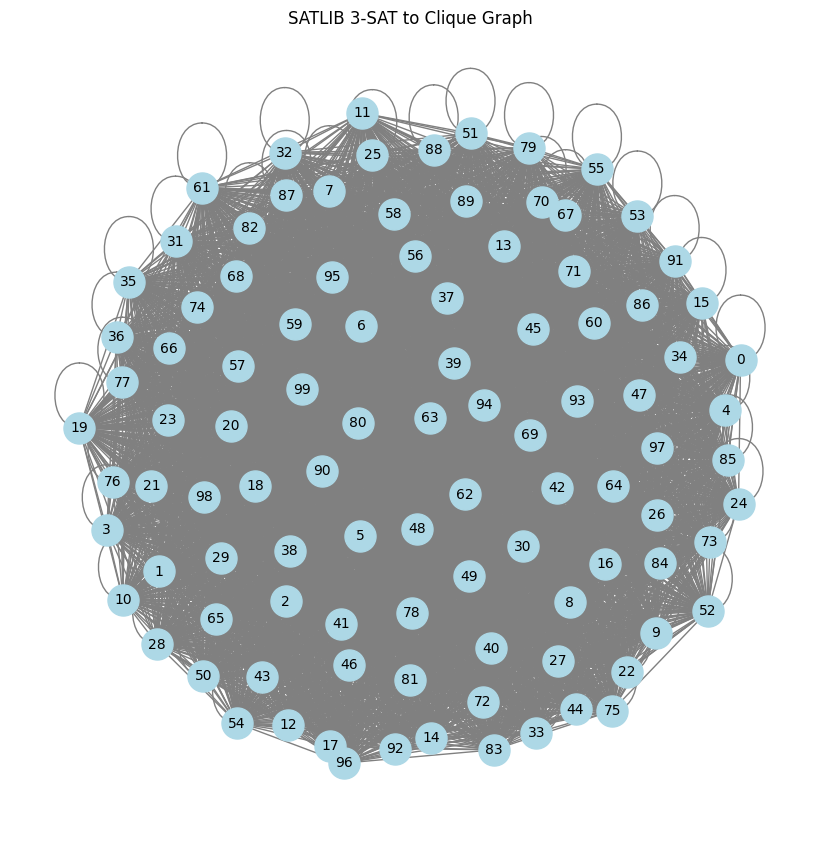

In [ ]:
import networkx as nx
import torch_geometric.utils as pyg_utils

def visualize_satlib_graph(data, title="SATLIB 3-SAT to Clique Graph"):
    G = pyg_utils.to_networkx(data, to_undirected=True)
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
            node_size=500, font_size=10)

    plt.title(title)
    plt.show()

visualize_satlib_graph(graph_dataset_satlib[0])